# Training Log Analysis

This notebook analyzes the training log from `custom_example/th_filtered_2gpus_v2/training_log.csv`

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

In [4]:
# Load the training log data
df = pd.read_csv('custom_example/th_filtered_2gpus_v2/training_log.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset shape: (15, 10)

Column names:
['iteration', 'epoch', 'train_loss', 'valid_loss', 'accuracy', 'norm_ED', 'best_accuracy', 'best_norm_ED', 'elapsed_time', 'learning_rate']

First few rows:


,iteration,epoch,train_loss,valid_loss,accuracy,norm_ED,best_accuracy,best_norm_ED,elapsed_time,learning_rate
0,100,0,7.05545,0.42315,38.691,0.8838,-1.000,-1.0000,56.48,0.001
1,200,0,0.26693,0.29174,54.936,0.9220,38.691,0.8838,526.54,0.001
2,300,0,0.18507,0.15317,69.681,0.9558,54.936,0.9220,1000.27,0.001
3,400,0,0.14094,0.16024,69.322,0.9556,69.681,0.9558,1472.40,0.001
4,500,0,0.10797,0.12164,76.086,0.9669,69.681,0.9558,1930.36,0.001


In [5]:
# Basic statistics
print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   iteration      15 non-null     int64  
 1   epoch          15 non-null     int64  
 2   train_loss     15 non-null     float64
 3   valid_loss     15 non-null     float64
 4   accuracy       15 non-null     float64
 5   norm_ED        15 non-null     float64
 6   best_accuracy  15 non-null     float64
 7   best_norm_ED   15 non-null     float64
 8   elapsed_time   15 non-null     float64
 9   learning_rate  15 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 1.3 KB
None

Basic Statistics:


,iteration,epoch,train_loss,valid_loss,accuracy,norm_ED,best_accuracy,best_norm_ED,elapsed_time,learning_rate
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,1.500000e+01
mean,800.000000,0.400000,0.571961,0.135669,75.774600,0.963053,70.362667,0.831713,3305.067333,1.000000e-03
std,447.213595,0.507093,1.794417,0.097743,13.280812,0.026764,23.693803,0.507425,2050.423280,4.489023e-19
min,100.000000,0.000000,0.064480,0.063970,38.691000,0.883800,-1.000000,-1.000000,56.480000,1.000000e-03
25%,450.000000,0.000000,0.071995,0.080410,72.883500,0.961350,69.681000,0.955800,1701.380000,1.000000e-03
50%,800.000000,0.000000,0.097760,0.108010,80.403000,0.972400,80.403000,0.972400,3335.600000,1.000000e-03
75%,1150.000000,1.000000,0.124455,0.138000,83.880500,0.978400,83.191000,0.977550,4934.605000,1.000000e-03
max,1500.000000,1.000000,7.055450,0.423150,87.263000,0.982400,87.263000,0.982400,6450.740000,1.000000e-03


In [6]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check unique epochs
print(f"\nNumber of epochs: {df['epoch'].nunique()}")
print(f"Epoch range: {df['epoch'].min()} to {df['epoch'].max()}")
print(f"Total iterations: {len(df)}")

Missing values:
iteration        0
epoch            0
train_loss       0
valid_loss       0
accuracy         0
norm_ED          0
best_accuracy    0
best_norm_ED     0
elapsed_time     0
learning_rate    0
dtype: int64

Number of epochs: 2
Epoch range: 0 to 1
Total iterations: 15


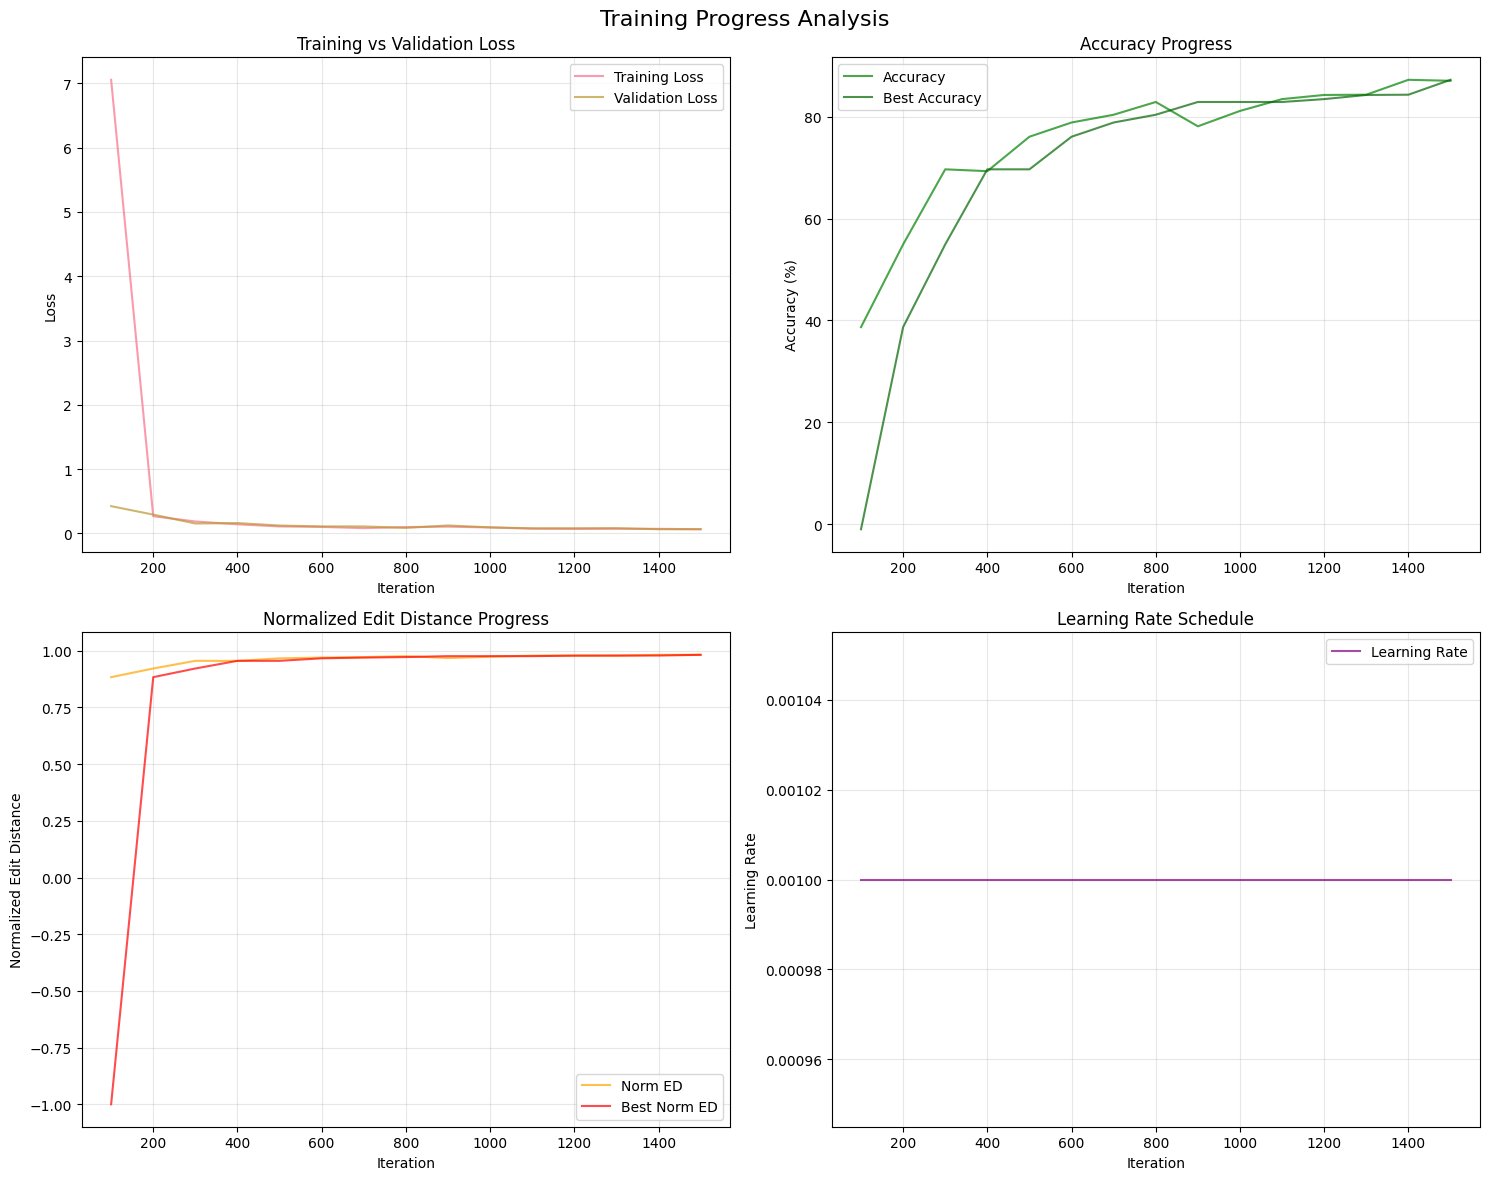

In [7]:
# Training Progress Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Training Progress Analysis', fontsize=16)

# Loss curves
axes[0, 0].plot(df['iteration'], df['train_loss'], label='Training Loss', alpha=0.7)
axes[0, 0].plot(df['iteration'], df['valid_loss'], label='Validation Loss', alpha=0.7)
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('Training vs Validation Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Accuracy progression
axes[0, 1].plot(df['iteration'], df['accuracy'], label='Accuracy', color='green', alpha=0.7)
axes[0, 1].plot(df['iteration'], df['best_accuracy'], label='Best Accuracy', color='darkgreen', alpha=0.7)
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Accuracy (%)')
axes[0, 1].set_title('Accuracy Progress')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Normalized Edit Distance
axes[1, 0].plot(df['iteration'], df['norm_ED'], label='Norm ED', color='orange', alpha=0.7)
axes[1, 0].plot(df['iteration'], df['best_norm_ED'], label='Best Norm ED', color='red', alpha=0.7)
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylabel('Normalized Edit Distance')
axes[1, 0].set_title('Normalized Edit Distance Progress')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Learning rate
axes[1, 1].plot(df['iteration'], df['learning_rate'], label='Learning Rate', color='purple', alpha=0.7)
axes[1, 1].set_xlabel('Iteration')
axes[1, 1].set_ylabel('Learning Rate')
axes[1, 1].set_title('Learning Rate Schedule')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

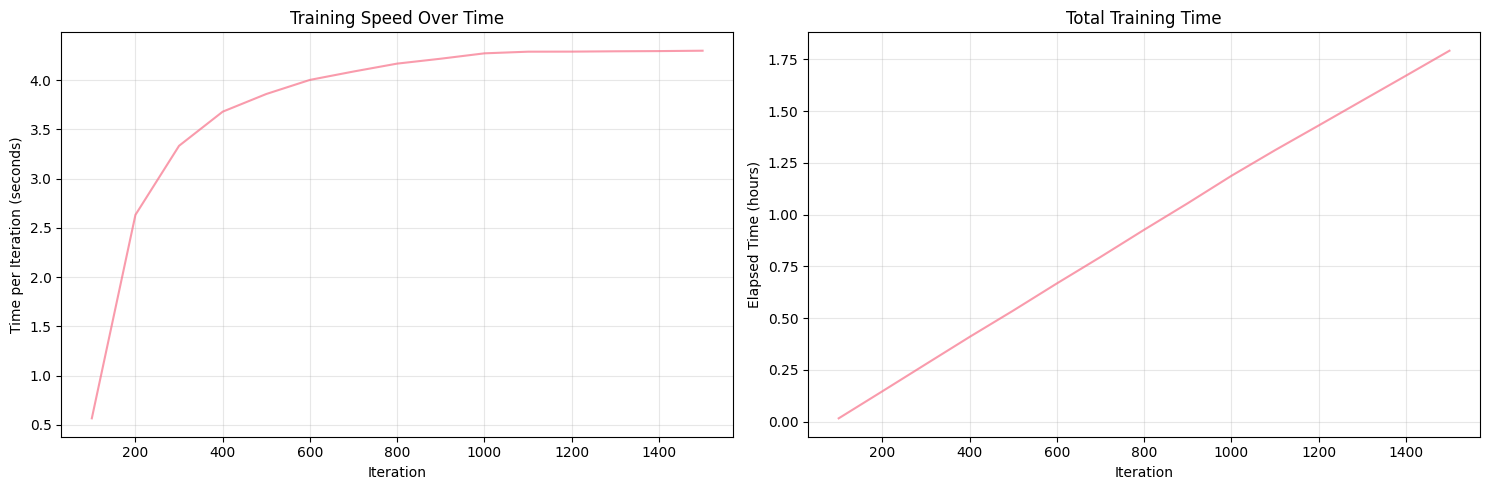

In [8]:
# Training efficiency analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Time per iteration
df['time_per_iteration'] = df['elapsed_time'] / df['iteration']
axes[0].plot(df['iteration'], df['time_per_iteration'], alpha=0.7)
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Time per Iteration (seconds)')
axes[0].set_title('Training Speed Over Time')
axes[0].grid(True, alpha=0.3)

# Elapsed time
axes[1].plot(df['iteration'], df['elapsed_time']/3600, alpha=0.7)  # Convert to hours
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Elapsed Time (hours)')
axes[1].set_title('Total Training Time')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
# Key metrics summary
print("=== TRAINING SUMMARY ===")
print(f"Total training iterations: {df['iteration'].max()}")
print(f"Total training time: {df['elapsed_time'].max()/3600:.2f} hours")
print(f"Final training loss: {df['train_loss'].iloc[-1]:.5f}")
print(f"Final validation loss: {df['valid_loss'].iloc[-1]:.5f}")
print(f"Final accuracy: {df['accuracy'].iloc[-1]:.3f}%")
print(f"Best accuracy achieved: {df['best_accuracy'].max():.3f}%")
print(f"Final normalized edit distance: {df['norm_ED'].iloc[-1]:.4f}")
print(f"Best normalized edit distance: {df['best_norm_ED'].max():.4f}")
print(f"Final learning rate: {df['learning_rate'].iloc[-1]:.6f}")

=== TRAINING SUMMARY ===
Total training iterations: 1500
Total training time: 1.79 hours
Final training loss: 0.06448
Final validation loss: 0.06429
Final accuracy: 87.069%
Best accuracy achieved: 87.263%
Final normalized edit distance: 0.9823
Best normalized edit distance: 0.9824
Final learning rate: 0.001000


In [10]:
# Find best performing iterations
best_acc_idx = df['accuracy'].idxmax()
best_ned_idx = df['norm_ED'].idxmax()
lowest_val_loss_idx = df['valid_loss'].idxmin()

print("=== BEST PERFORMANCE POINTS ===")
print(f"Best accuracy: {df.loc[best_acc_idx, 'accuracy']:.3f}% at iteration {df.loc[best_acc_idx, 'iteration']}")
print(f"Best norm ED: {df.loc[best_ned_idx, 'norm_ED']:.4f} at iteration {df.loc[best_ned_idx, 'iteration']}")
print(f"Lowest validation loss: {df.loc[lowest_val_loss_idx, 'valid_loss']:.5f} at iteration {df.loc[lowest_val_loss_idx, 'iteration']}")

=== BEST PERFORMANCE POINTS ===
Best accuracy: 87.263% at iteration 1400
Best norm ED: 0.9824 at iteration 1400
Lowest validation loss: 0.06397 at iteration 1400


In [11]:
# Loss improvement analysis
initial_train_loss = df['train_loss'].iloc[0]
final_train_loss = df['train_loss'].iloc[-1]
initial_val_loss = df['valid_loss'].iloc[0]
final_val_loss = df['valid_loss'].iloc[-1]

train_loss_improvement = (initial_train_loss - final_train_loss) / initial_train_loss * 100
val_loss_improvement = (initial_val_loss - final_val_loss) / initial_val_loss * 100

print("=== IMPROVEMENT ANALYSIS ===")
print(f"Training loss improvement: {train_loss_improvement:.2f}%")
print(f"Validation loss improvement: {val_loss_improvement:.2f}%")
print(f"Accuracy improvement: {df['accuracy'].iloc[-1] - df['accuracy'].iloc[0]:.2f} percentage points")
print(f"Norm ED improvement: {df['norm_ED'].iloc[-1] - df['norm_ED'].iloc[0]:.4f}")

=== IMPROVEMENT ANALYSIS ===
Training loss improvement: 99.09%
Validation loss improvement: 84.81%
Accuracy improvement: 48.38 percentage points
Norm ED improvement: 0.0985
